# Correlation matrix

In practice (particularly in image analysis) we often calculate a large variety of features that may often be strongly correlated with other features. The introduced correlation coefficients can help us to identify groups of redundant features.

In [1]:
from skimage import data, filters, measure
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
image = data.human_mitosis()

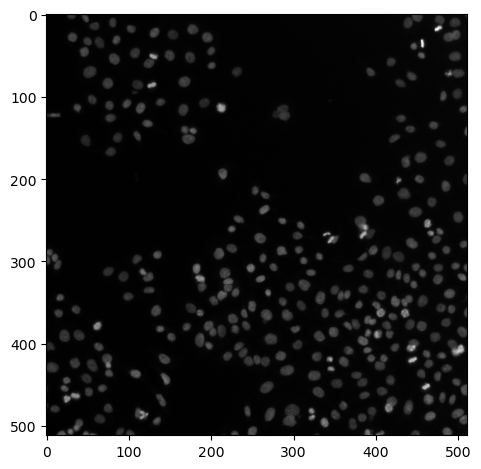

In [17]:
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')
fig.tight_layout()
fig.savefig('./human_mitosis.png')

In [4]:
binary = image > filters.threshold_otsu(image)
labels = measure.label(binary)

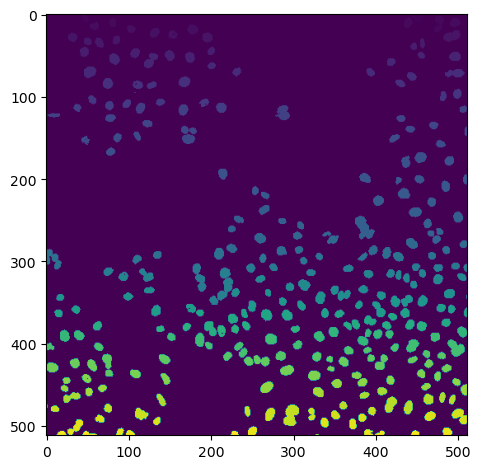

In [18]:
fig, ax = plt.subplots()
ax.imshow(labels)
fig.tight_layout()
fig.savefig('./human_mitosis_labels.png')

In [6]:
props = measure.regionprops_table(labels, intensity_image=image, properties=['area', 'area_bbox', 'area_convex',
                                                                    'area_filled', 'axis_major_length',
                                                                    'axis_minor_length', 'eccentricity',
                                                                    'equivalent_diameter_area', 'extent',
                                                                    'feret_diameter_max', 'intensity_max',
                                                                    'intensity_mean', 'intensity_min'])
df = pd.DataFrame(props)
df

,area,area_bbox,area_convex,area_filled,axis_major_length,axis_minor_length,eccentricity,equivalent_diameter_area,extent,feret_diameter_max,intensity_max,intensity_mean,intensity_min
0,62,70,63,62,10.571311,7.557049,0.699264,8.884866,0.885714,10.770330,63.0,50.645161,40.0
1,7,7,7,7,8.000000,0.000000,1.000000,2.985411,1.000000,7.000000,68.0,58.285714,39.0
2,121,143,124,121,13.746529,11.516064,0.546064,12.412171,0.846154,14.317821,82.0,61.487603,39.0
3,19,24,20,19,6.674754,3.805741,0.821527,4.918491,0.791667,6.708204,78.0,58.473684,39.0
4,62,80,65,62,11.482908,6.872199,0.801144,8.884866,0.775000,11.661904,86.0,63.387097,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,45,60,48,45,11.333091,5.339585,0.882053,7.569398,0.750000,12.041595,102.0,78.533333,42.0
289,49,90,61,49,18.128803,4.509369,0.968570,7.898654,0.544444,18.027756,100.0,73.387755,40.0
290,39,50,42,39,9.496172,5.480726,0.816637,7.046726,0.780000,10.049876,87.0,66.000000,39.0
291,4,4,4,4,4.472136,0.000000,1.000000,2.256758,1.000000,4.000000,59.0,53.750000,45.0


We can calculate a correlation matrix using a given correlation metric with pandas:

In [7]:
correlation_matrix = df.corr(method='pearson')

It seems obvious that there is quite a large number of features that are strongly connected to each other - Seaborn offers the `heatmap` function for this:

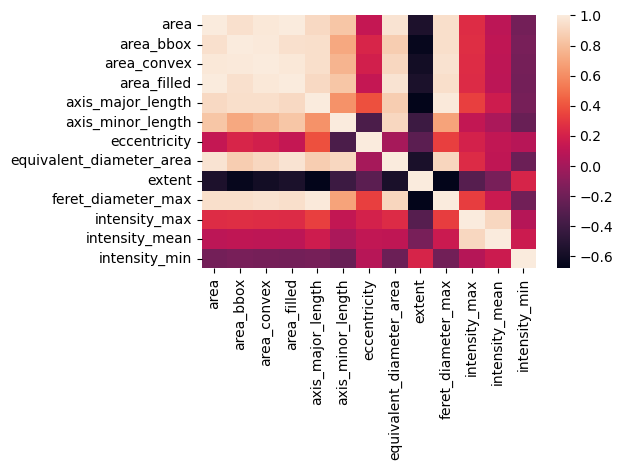

In [22]:
ax = sns.heatmap(correlation_matrix, annot=False)
ax.figure.tight_layout()
ax.figure.savefig('./correlation_matrix.png')

Maybe we can make this even clearer by rearranging some of the columns/rows. We can use the seaborn `clustermap` feature for this:

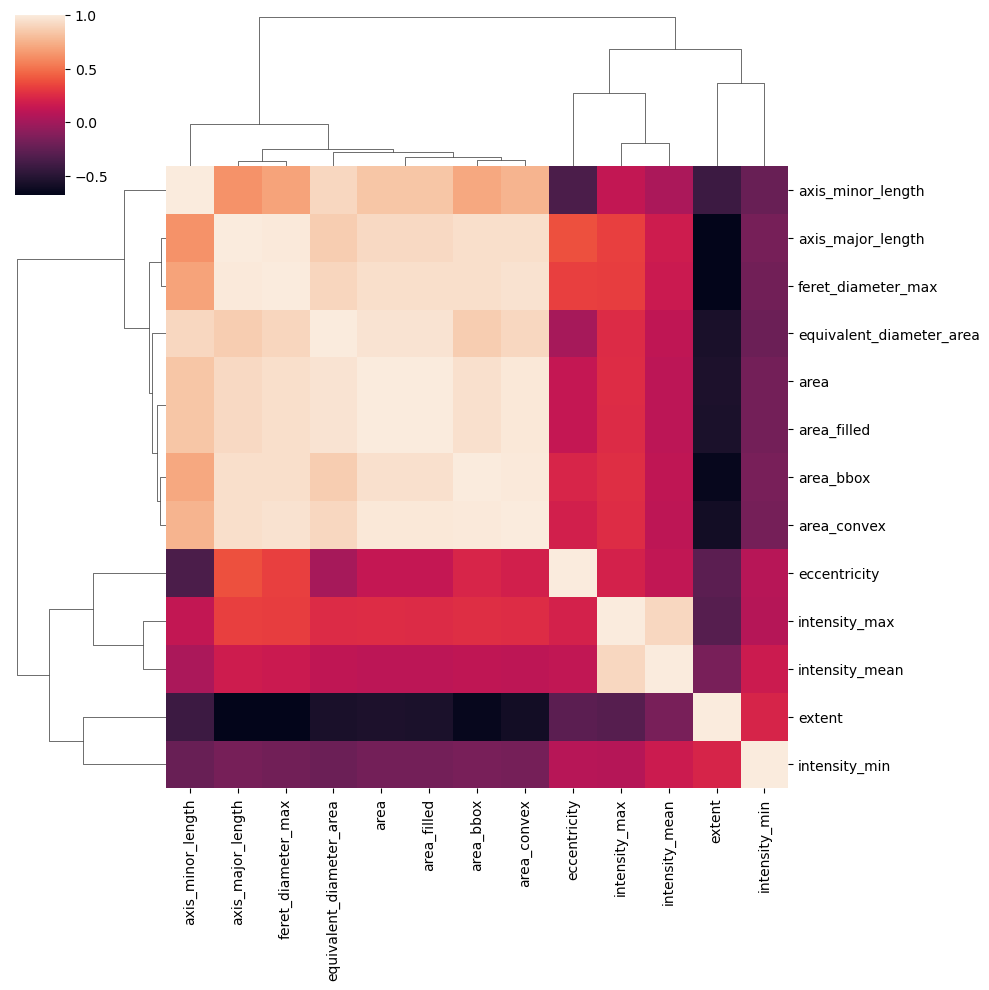

In [24]:
fig = sns.clustermap(correlation_matrix)


In [26]:
fig.savefig('./seaborn_features_clustermap.png')